In [3]:
# Add the directory containing api_connection.py to the system path
import sys
import os
from pathlib import Path
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import DensityMatrix, partial_trace, entropy, Statevector
from qiskit_experiments.library import StateTomography
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
sys.path.append(str(Path.cwd() / "bachelor_thesis"))
from api_connection import QiskitService
from qiskit_aer import AerSimulator  # For simulation comparison


In [4]:
#backend = AerProvider().get_backend("qasm_simulator")
service  = QiskitService(str(Path.cwd() / ".env"))
backend = service.get_least_busy_backend()

Connected to IBM Quantum.


In [1]:
# Define quantum and classical registers
data = QuantumRegister(7, 'data')          # 7 data qubits for the encoded state
logical_out = ClassicalRegister(7, 'out')  # Changed to 7 bits to match classical version

# Initialize the quantum circuit
circuit = QuantumCircuit(data, logical_out)

# Step 1: Encode the logical |0_L⟩ state
circuit.h(data[4])
circuit.h(data[5])
circuit.h(data[6])
circuit.cx(data[4], data[0])
circuit.cx(data[4], data[1])
circuit.cx(data[4], data[2])
circuit.cx(data[5], data[0])
circuit.cx(data[5], data[1])
circuit.cx(data[5], data[3])
circuit.cx(data[6], data[0])
circuit.cx(data[6], data[2])
circuit.cx(data[6], data[3])
circuit.barrier()


# Step 6: Measure all data qubits to verify correction
for i in range(7):
    circuit.measure(data[i], logical_out[i])  # Measure each qubit into its own bit
circuit.barrier()
# Uncomment to draw (optional)
#circuit.draw(output='mpl')

NameError: name 'QuantumRegister' is not defined

In [4]:
simulator = AerSimulator(method='statevector')
classic_job = simulator.run(circuit, shots=5000)
classic_result = classic_job.result()

# Get and display results
classic_result = classic_job.result()

print(classic_result.get_counts())
# 7 bits for logical output


# 3 bits for Z syndromes 
#   Detects bit flips
# 3 bits for X syndromes
#   Detects phase flips

{'0010111 111 000': 659, '0000000 111 000': 663, '1001101 111 000': 593, '0111100 111 000': 621, '1110001 111 000': 585, '0101011 111 000': 599, '1100110 111 000': 677, '1011010 111 000': 603}


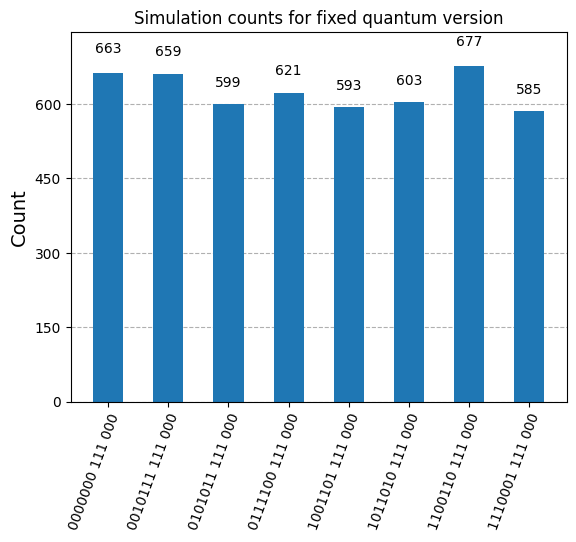

In [5]:
plot_histogram(classic_result.get_counts(), title='Simulation counts for fixed quantum version')

* Classic error correcting version down below

In [6]:
#   from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
#   from qiskit_aer import AerSimulator
#   
#   # Define registers
#   data = QuantumRegister(7, 'data')
#   ancilla_x0 = QuantumRegister(1, 'anc_x0')
#   ancilla_x1 = QuantumRegister(1, 'anc_x1')
#   ancilla_x2 = QuantumRegister(1, 'anc_x2')
#   ancilla_z0 = QuantumRegister(1, 'anc_z0')
#   ancilla_z1 = QuantumRegister(1, 'anc_z1')
#   ancilla_z2 = QuantumRegister(1, 'anc_z2')
#   syndrome_x = ClassicalRegister(3, 'sx')
#   syndrome_z = ClassicalRegister(3, 'sz')
#   logical_out = ClassicalRegister(7, 'out')  # Changed to 7 bits
#   
#   # Initialize circuit
#   circuit = QuantumCircuit(data, ancilla_x0, ancilla_x1, ancilla_x2, ancilla_z0, ancilla_z1, ancilla_z2, syndrome_x, syndrome_z, logical_out)
#   
#   # Step 1: Encode |0_L⟩
#   circuit.h(data[4])
#   circuit.h(data[5])
#   circuit.h(data[6])
#   circuit.cx(data[4], data[0])
#   circuit.cx(data[4], data[1])
#   circuit.cx(data[4], data[2])
#   circuit.cx(data[5], data[0])
#   circuit.cx(data[5], data[1])
#   circuit.cx(data[5], data[3])
#   circuit.cx(data[6], data[0])
#   circuit.cx(data[6], data[2])
#   circuit.cx(data[6], data[3])
#   circuit.barrier()
#   
#   # Step 2: Introduce X error on data[0]
#   circuit.x(data[0])
#   circuit.barrier()
#   
#   # Step 3: Measure X stabilizers
#   circuit.h(ancilla_x0[0])
#   circuit.cx(ancilla_x0[0], data[0])
#   circuit.cx(ancilla_x0[0], data[1])
#   circuit.cx(ancilla_x0[0], data[2])
#   circuit.cx(ancilla_x0[0], data[4])
#   circuit.h(ancilla_x0[0])
#   circuit.measure(ancilla_x0[0], syndrome_x[0])
#   circuit.barrier()
#   
#   circuit.h(ancilla_x1[0])
#   circuit.cx(ancilla_x1[0], data[0])
#   circuit.cx(ancilla_x1[0], data[1])
#   circuit.cx(ancilla_x1[0], data[3])
#   circuit.cx(ancilla_x1[0], data[5])
#   circuit.h(ancilla_x1[0])
#   circuit.measure(ancilla_x1[0], syndrome_x[1])
#   circuit.barrier()
#   
#   circuit.h(ancilla_x2[0])
#   circuit.cx(ancilla_x2[0], data[0])
#   circuit.cx(ancilla_x2[0], data[2])
#   circuit.cx(ancilla_x2[0], data[3])
#   circuit.cx(ancilla_x2[0], data[6])
#   circuit.h(ancilla_x2[0])
#   circuit.measure(ancilla_x2[0], syndrome_x[2])
#   circuit.barrier()
#   
#   # Step 4: Measure Z stabilizers
#   circuit.h(ancilla_z0[0])
#   circuit.cz(ancilla_z0[0], data[0])
#   circuit.cz(ancilla_z0[0], data[1])
#   circuit.cz(ancilla_z0[0], data[2])
#   circuit.cz(ancilla_z0[0], data[4])
#   circuit.h(ancilla_z0[0])
#   circuit.measure(ancilla_z0[0], syndrome_z[0])
#   circuit.barrier()
#   
#   circuit.h(ancilla_z1[0])
#   circuit.cz(ancilla_z1[0], data[0])
#   circuit.cz(ancilla_z1[0], data[1])
#   circuit.cz(ancilla_z1[0], data[3])
#   circuit.cz(ancilla_z1[0], data[5])
#   circuit.h(ancilla_z1[0])
#   circuit.measure(ancilla_z1[0], syndrome_z[1])
#   circuit.barrier()
#   
#   circuit.h(ancilla_z2[0])
#   circuit.cz(ancilla_z2[0], data[0])
#   circuit.cz(ancilla_z2[0], data[2])
#   circuit.cz(ancilla_z2[0], data[3])
#   circuit.cz(ancilla_z2[0], data[6])
#   circuit.h(ancilla_z2[0])
#   circuit.measure(ancilla_z2[0], syndrome_z[2])
#   circuit.barrier()
#   
#   # Step 5: Apply corrections
#   with circuit.if_test((syndrome_x, 0b111)): circuit.z(data[0])
#   with circuit.if_test((syndrome_x, 0b011)): circuit.z(data[1])
#   with circuit.if_test((syndrome_x, 0b101)): circuit.z(data[2])
#   with circuit.if_test((syndrome_x, 0b110)): circuit.z(data[3])
#   with circuit.if_test((syndrome_x, 0b001)): circuit.z(data[4])
#   with circuit.if_test((syndrome_x, 0b010)): circuit.z(data[5])
#   with circuit.if_test((syndrome_x, 0b100)): circuit.z(data[6])
#   
#   with circuit.if_test((syndrome_z, 0b111)): circuit.x(data[0])
#   with circuit.if_test((syndrome_z, 0b011)): circuit.x(data[1])
#   with circuit.if_test((syndrome_z, 0b101)): circuit.x(data[2])
#   with circuit.if_test((syndrome_z, 0b110)): circuit.x(data[3])
#   with circuit.if_test((syndrome_z, 0b001)): circuit.x(data[4])
#   with circuit.if_test((syndrome_z, 0b010)): circuit.x(data[5])
#   with circuit.if_test((syndrome_z, 0b100)): circuit.x(data[6])
#   circuit.barrier()
#   
#   # Step 6: Measure all data qubits to verify correction
#   for i in range(7):
#       circuit.measure(data[i], logical_out[i])
#   circuit.barrier()
#   
#   # Simulate
#   simulator = AerSimulator(method='statevector')
#   job = simulator.run(circuit, shots=4096)
#   result = job.result()
#   counts = result.get_counts()
#   print("Corrected simulation counts:", counts)

In [7]:
# Set up the preset pass manager with optimization level 0
preset_manager = generate_preset_pass_manager(backend,)# optimization_level=3)
preset_circuit = preset_manager.run(circuit)

# Run the circuit using the Sampler
job = Sampler(mode=backend).run([(preset_circuit)], shots=5000)
print(f"Job ID: {job.job_id()}, \n Job Status: {job.status()}")

Job ID: czgk7h6hrmy00084237g, 
 Job Status: QUEUED


In [8]:
# Get and display results
result = job.result()
pub_result = result[0]
#syndromme x finds phase flips
print(f"Counts for the 'sx' output register: {pub_result.data.sx.get_counts()}")
#syndrome z finds bit flips
print(f"Counts for the 'sz' output register: {pub_result.data.sz.get_counts()}")

#syndrome z finds bit flips
print(f"Counts for the 'out' output register: {pub_result.data.out.get_counts()}")

Counts for the 'sx' output register: {'010': 574, '111': 517, '000': 739, '100': 754, '101': 658, '110': 609, '011': 521, '001': 628}
Counts for the 'sz' output register: {'010': 543, '111': 562, '000': 648, '100': 677, '101': 717, '001': 717, '110': 550, '011': 586}
Counts for the 'out' output register: {'0101001': 41, '0001011': 52, '0000001': 85, '1011000': 36, '0011101': 51, '0001100': 81, '0101100': 29, '1010001': 44, '1100011': 20, '1010000': 46, '0010111': 46, '0100110': 35, '0101110': 23, '0010000': 63, '1000001': 93, '1010011': 38, '1001101': 78, '1000100': 82, '1101110': 15, '1000111': 68, '1110001': 21, '0000101': 85, '0001001': 85, '0010110': 55, '0101101': 32, '0001010': 55, '1001010': 54, '1111001': 18, '0011111': 44, '1100000': 32, '1001000': 71, '1110100': 21, '0001111': 51, '0001110': 60, '0110100': 33, '0001101': 57, '0111111': 11, '0100010': 30, '0100000': 30, '1011110': 28, '0000100': 68, '0001000': 73, '1011011': 33, '1001011': 62, '1000010': 59, '0011001': 44, '10

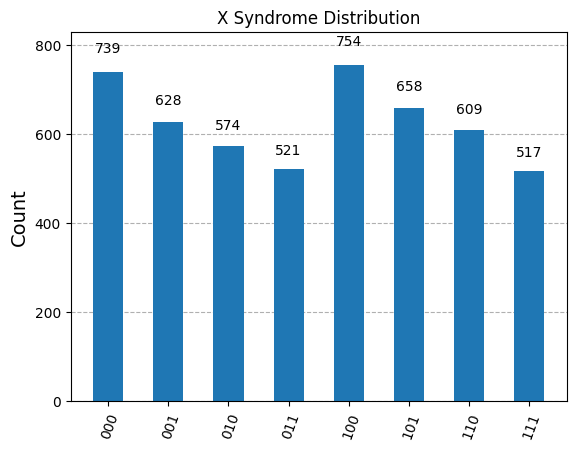

In [9]:

# Optional: Visualize the syndrome distributions
plot_histogram(pub_result.data.sx.get_counts(), title="X Syndrome Distribution")

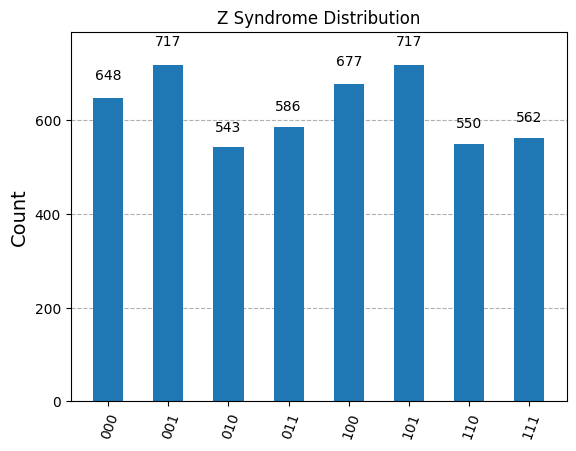

In [10]:
plot_histogram(pub_result.data.sz.get_counts(), title="Z Syndrome Distribution")


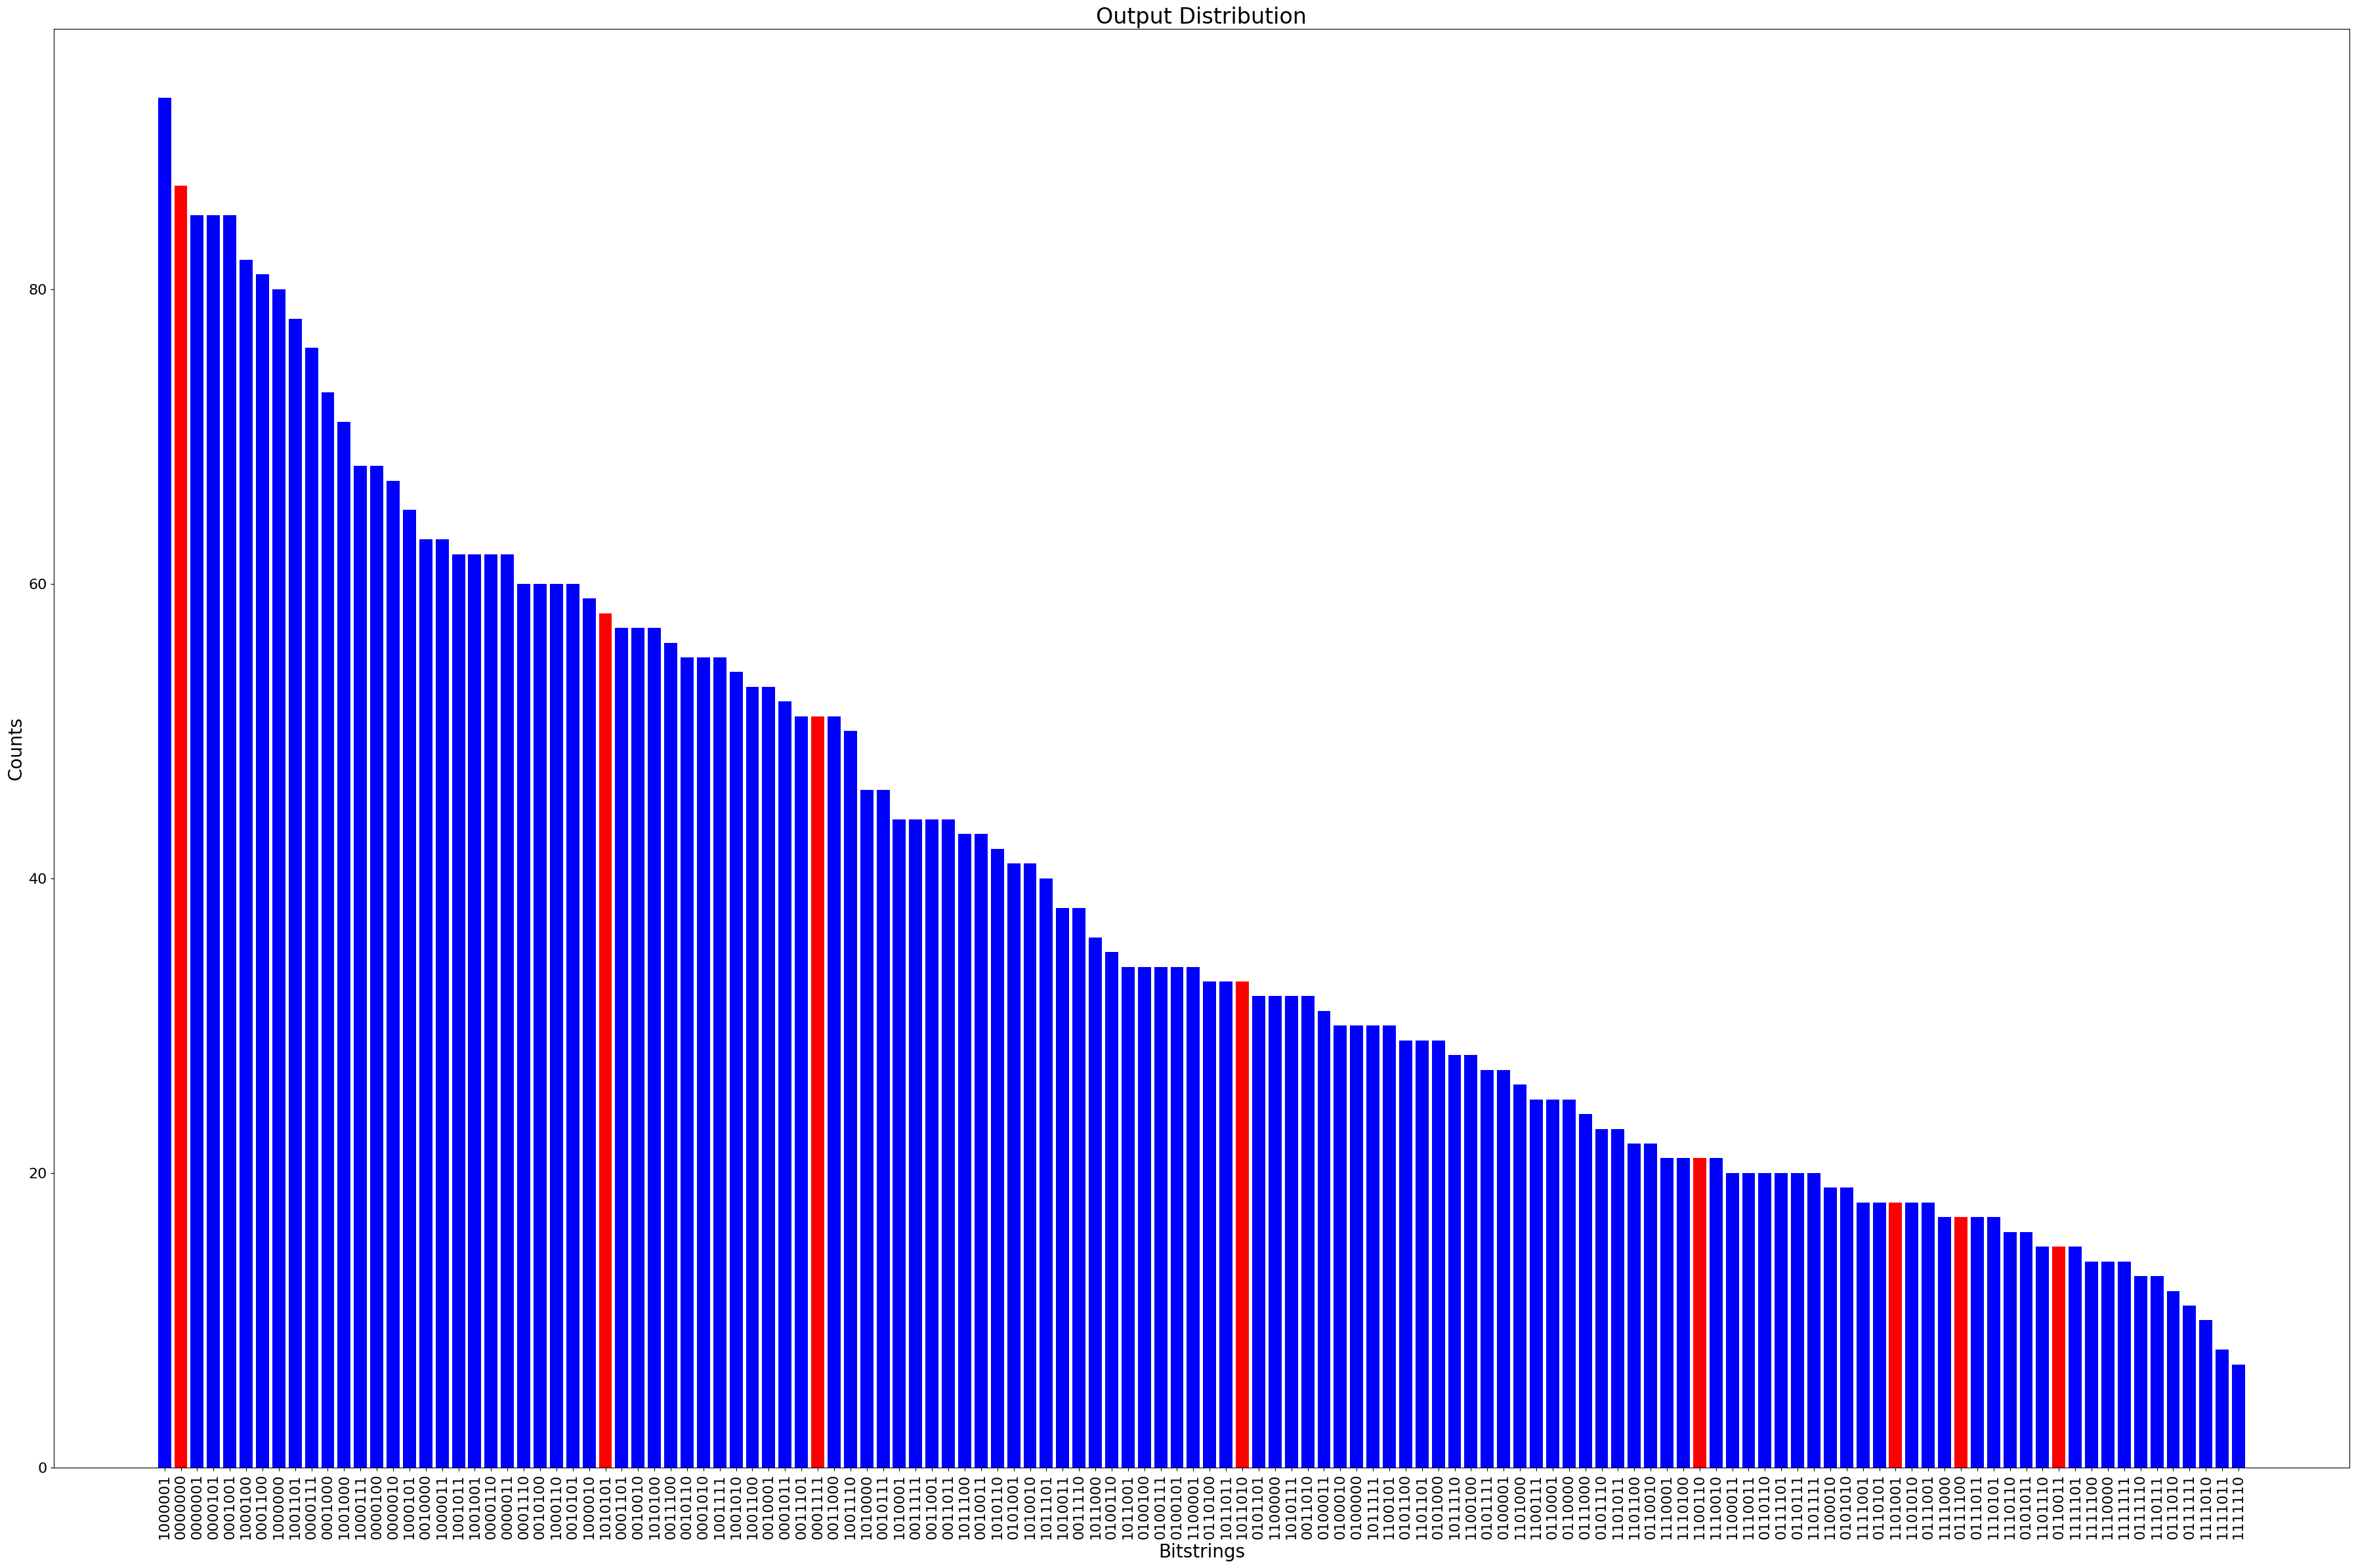

In [14]:
import matplotlib.pyplot as plt

# Define the outputs to highlight in red
steane_code_logic_0 = {"0000000", "1010101", "0110011", "1100110", "0001111", "1011010", "0111100", "1101001"}

# Get the counts data
counts = pub_result.data.out.get_counts()

# Sort the counts for better visualization
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
keys = list(sorted_counts.keys())
values = list(sorted_counts.values())
colors = ["red" if key in steane_code_logic_0 else "blue" for key in keys]

# Create the bar chart
plt.figure(figsize=(36, 24))
plt.bar(keys, values, color=colors)

# Add labels and title
plt.xlabel("Bitstrings", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.title("Output Distribution", fontsize=24)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()